# 互评作业1: 数据探索性分析与数据预处理-Wine Reviews

## 1. 数据集：Wine Reviews

此数据集包含两个csv文件：

- winemag-data_first150k.csv：10列，15万条数据

- winemag-data-130k-v2.csv：13列，13万条数据

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# 载入数据
f_150k = "data/Wine-Reviews/winemag-data_first150k.csv"
f_130k = "data/Wine-Reviews/winemag-data-130k-v2.csv"
data = pd.read_csv(f_150k, index_col=0)

数据展示

In [3]:
data.head(5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
data.shape

(150930, 10)

**数据属性描述**
- country 国家 
- desprition 描述
- designation 酿酒厂内的葡萄园
- points 评分分数
- price 价格
- province 省份或洲
- region_1 一个省或州（即纳帕）的葡萄酒产区1
- region_2 葡萄酒产区指定的更具体的区域，但此值有时可能为空
- variety 葡萄品种
- winery 酿酒厂 

In [5]:
data.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

## 2. 数据分析

### 2.1 数据可视化和摘要

- 数据摘要
    - 标称属性，给出每个可能取值的频数
    - 数值属性，给出5数概括及缺失值的个数
- 数据可视化
    - 使用直方图、盒图等检查数据分布及离群点

#### 2.1.1 标称属性

- **country国家**

In [6]:
countrySeries = data["country"].value_counts(dropna=False)   # dropna=True：是否删除缺失值nan，默认删除
countrySeries

US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12
England 

<AxesSubplot:>

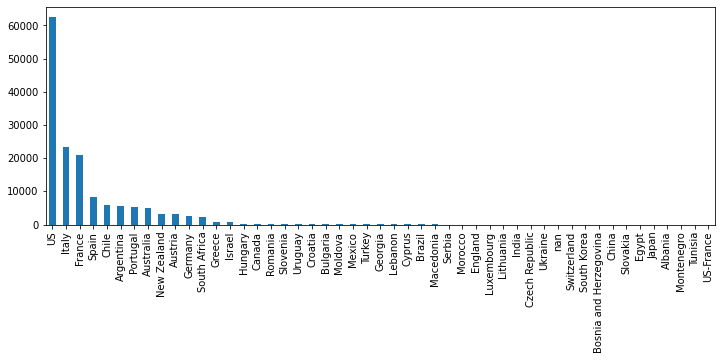

In [7]:
countrySeries.plot(kind="bar",figsize=(12,4))

- **designation葡萄酒庄**

In [8]:
designationSeries = data["designation"].value_counts(dropna=False)
designationSeries

NaN                                  45735
Reserve                               2752
Reserva                               1810
Estate                                1571
Barrel sample                         1326
                                     ...  
Coastal - Private Selection              1
??? Vineyard                             1
Femme Brut                               1
The Estates Northridge                   1
Family Reserve Generations Estate        1
Name: designation, Length: 30622, dtype: int64

<AxesSubplot:>

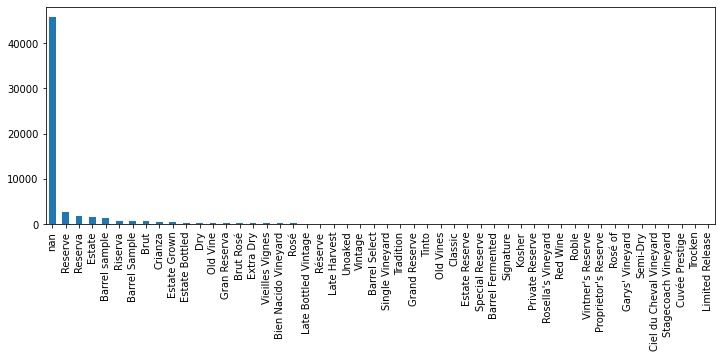

In [9]:
designationSeries[:50].plot(kind="bar",figsize=(12,4))

- **province省份**

In [10]:
provinceSeries = data["province"].value_counts(dropna=False)
provinceSeries

California                   44508
Washington                    9750
Tuscany                       7281
Bordeaux                      6111
Northern Spain                4892
                             ...  
Central Otago-Marlborough        1
Ioannina                         1
Central Greece                   1
Neuchâtel                        1
Zitsa                            1
Name: province, Length: 456, dtype: int64

<AxesSubplot:>

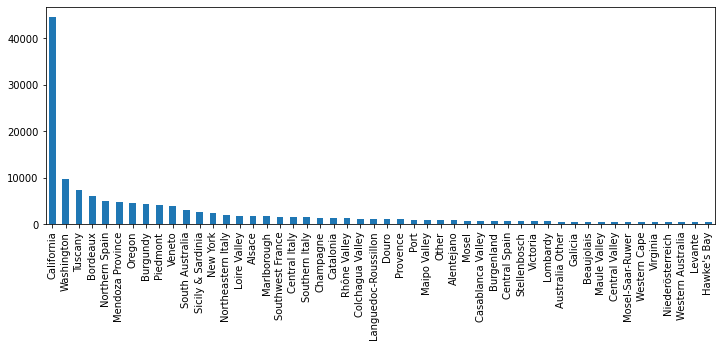

In [11]:
provinceSeries[:50].plot(kind="bar",figsize=(12,4))

- **region_1区域1**

In [12]:
region_1Series = data["region_1"].value_counts(dropna=False)
region_1Series

NaN                                     25060
Napa Valley                              6209
Columbia Valley (WA)                     4975
Mendoza                                  3586
Russian River Valley                     3571
                                        ...  
Vin de Pays de Côtes du Tarn                1
Saint-Georges-Saint-Émilion                 1
Colline Teramane                            1
Rasteau                                     1
Vin de Pays des Coteaux de L'Ardeche        1
Name: region_1, Length: 1237, dtype: int64

<AxesSubplot:>

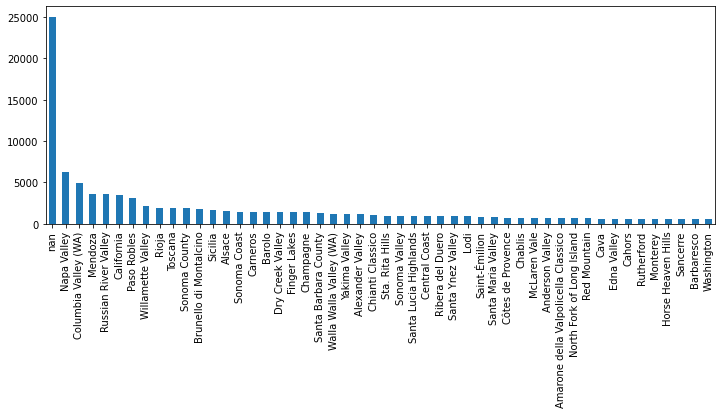

In [13]:
region_1Series[:50].plot(kind="bar",figsize=(12,4))

- **region_2区域2**

In [14]:
region_2Series = data["region_2"].value_counts(dropna=False)
region_2Series

NaN                        89977
Central Coast              13057
Sonoma                     11258
Columbia Valley             9157
Napa                        8801
California Other            3516
Willamette Valley           3181
Mendocino/Lake Counties     2389
Sierra Foothills            1660
Napa-Sonoma                 1645
Finger Lakes                1510
Central Valley              1115
Long Island                  771
Southern Oregon              662
Oregon Other                 661
North Coast                  632
Washington Other             593
South Coast                  198
New York Other               147
Name: region_2, dtype: int64

<AxesSubplot:>

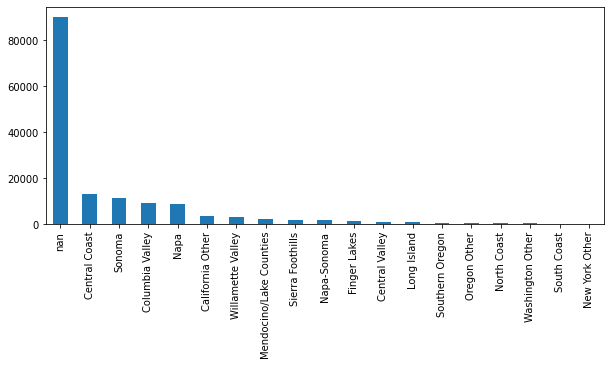

In [15]:
region_2Series.plot(kind="bar",figsize=(10,4))

- **variety葡萄种类**

In [16]:
varietySeries = data["variety"].value_counts(dropna=False)
varietySeries

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
                            ...  
Freisa                          1
Forcallà                        1
Syrah-Bonarda                   1
Trousseau Gris                  1
Rebula                          1
Name: variety, Length: 632, dtype: int64

<AxesSubplot:>

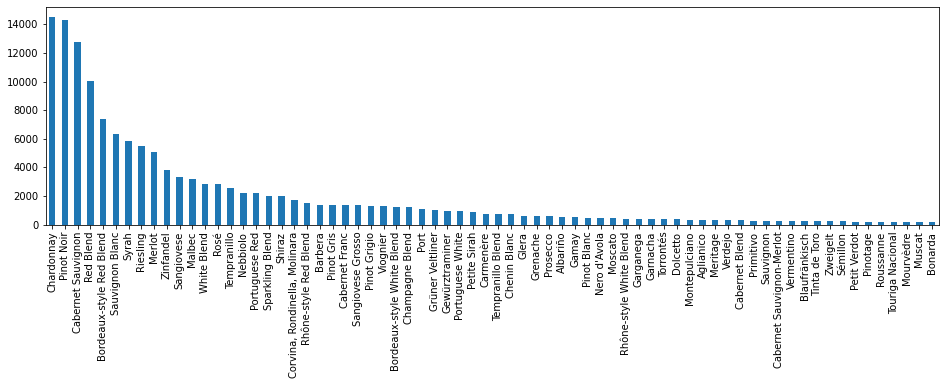

In [17]:
varietySeries[:70].plot(kind="bar",figsize=(16,4))

- **winery酿酒厂**

In [18]:
winerySeries = data["winery"].value_counts(dropna=False)
winerySeries

Williams Selyem                   374
Testarossa                        274
DFJ Vinhos                        258
Chateau Ste. Michelle             225
Columbia Crest                    217
                                 ... 
Château les Terrasses de Bouey      1
Barón de Oña                        1
White Knot                          1
JJ Hahn                             1
La Croix Martelle                   1
Name: winery, Length: 14810, dtype: int64

<AxesSubplot:>

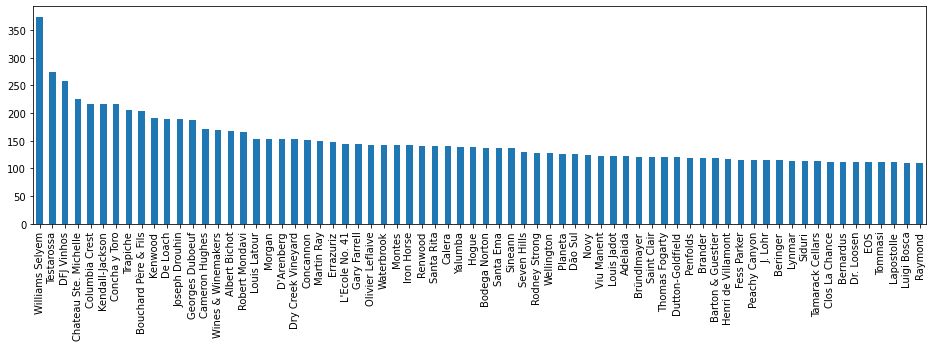

In [19]:
winerySeries[:70].plot(kind="bar",figsize=(16,4))

#### 2.1.2 数值属性

- **points得分**

In [20]:
# 给出五数概括
attri = "points"
print("最小值Min：", data[attri].quantile(0))
print("下四分位数Q1：", data[attri].quantile(0.25))
print("中位数Median：", data[attri].quantile(0.5))
print("上四分位数Q3：", data[attri].quantile(0.75))
print("最大值Max：", data[attri].quantile(1))

最小值Min： 80.0
下四分位数Q1： 86.0
中位数Median： 88.0
上四分位数Q3： 90.0
最大值Max： 100.0


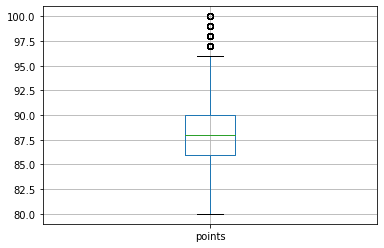

In [21]:
# 绘制盒图
p = data.boxplot([attri],return_type='dict')

In [22]:
# 检查离群点
print(p['fliers'][0].get_ydata())
print("MIN: ",end="")
print(min(p['fliers'][0].get_ydata()))

[100  99  98  98  98  97  97  97  97  97  97  97  97  97  97  97  97  97
  97  97  97  97  97  98  97  98  97  97  97  97  97  97  98  97  97  97
  97  97  97  98  97  97  97  97  97  97  97  97 100 100  99  99  98  98
  98  98  98  98  97  97  97  97  97  97  98  98  98  98  97  97  97  97
  97  97  97  98  97  97  97  97 100  99  99  98  98  98  98  98  98  97
  97  97  97 100  99  98  97  97  97  97  97  97  97  97  97  99  97  98
  97  97  97  97  97  97 100  98  98  97  97  97  97  97  97  97  97  97
  97  97  97  97  97  97  97  97  97  99  97  97  99  99  99  98  98  98
  98  98  97  97  97  97  97  97  99  97  97  97  97  97  97  97  97  97
 100  99  99  98  98  98  98  98  98  97  97  97  97  97  99  99  98  97
  97  97  97  97  98  98  97  97  97  97  97 100  99  98  97  97  97  97
  97  97  98  97  97  97  97  97  97  97  99  99  99  98  98  98  98  97
  97  97  97  97  97  97  97  97  97  97  97  97  98  97  97  97  98  98
  97  98  99  98  98  97  97  97  97  97  99  98  9

因此，points中大于等于97的项被识别为离群点。

- **price价格**

In [23]:
# 给出五数概括
attri = "price"
print("最小值Min：", data[attri].quantile(0))
print("下四分位数Q1：", data[attri].quantile(0.25))
print("中位数Median：", data[attri].quantile(0.5))
print("上四分位数Q3：", data[attri].quantile(0.75))
print("最大值Max：", data[attri].quantile(1))

最小值Min： 4.0
下四分位数Q1： 16.0
中位数Median： 24.0
上四分位数Q3： 40.0
最大值Max： 2300.0


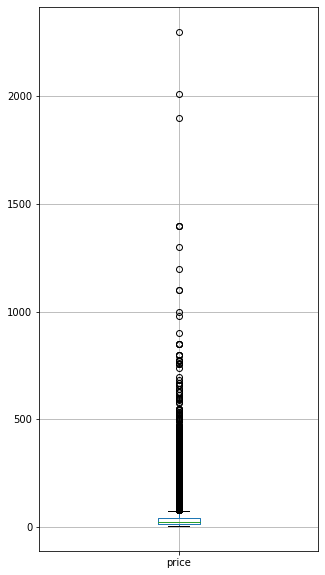

In [24]:
# 绘制盒图
p = data.boxplot([attri],return_type='dict',figsize=(5,10))

In [25]:
# 检查离群点
print(p['fliers'][0].get_ydata())
print("MIN: ",end="")
print(min(p['fliers'][0].get_ydata()))

[235. 110.  90. ...  83. 100.  87.]
MIN: 77.0


因此，price中大于等于77的项被识别为离群点。

### 2.2 数据缺失的处理

观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

- 将缺失部分剔除
- 用最高频率值来填补缺失值
- 通过属性的相关关系来填补缺失值
- 通过数据对象之间的相似性来填补缺失值

注意：在处理后，要可视化地对比新旧数据集。

In [26]:
# 首先统计所有属性的缺失值
print(data.isnull().sum(axis=0))

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64


#### （1）处理country和province属性缺失--通过属性的相关关系来填补缺失值（以country为例）
缺失值仅有5项，可能人为失误。可使用属性“designation”来获取其所属country和province。

In [27]:
# 获取country属性缺失的5条数据
attri = "country"
country_null = data.loc[data[attri].isnull()]
country_null["designation"].value_counts()

Piedra Feliz    3
Askitikos       1
Shah            1
Name: designation, dtype: int64

In [28]:
# 根据缺失值的分布，定义一个从designation到country的转换字典
designation2country = {
    "Askitikos":"Greece",    
    "Shah":"US",
    "Piedra Feliz":"Chile",
}

In [29]:
# 处理缺失值
# 获取country缺失值对应的index
ind = country_null.index.tolist()
ind

[1133, 1440, 68226, 113016, 135696]

In [30]:
# 补全数据
data_new = data.copy()  # 深拷贝
for i in ind:
    designation = data_new.iloc[i,2]
    data_new.iloc[i,0] = designation2country[designation]

<AxesSubplot:>

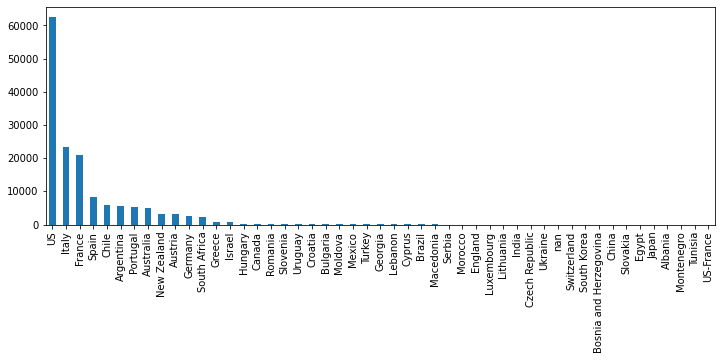

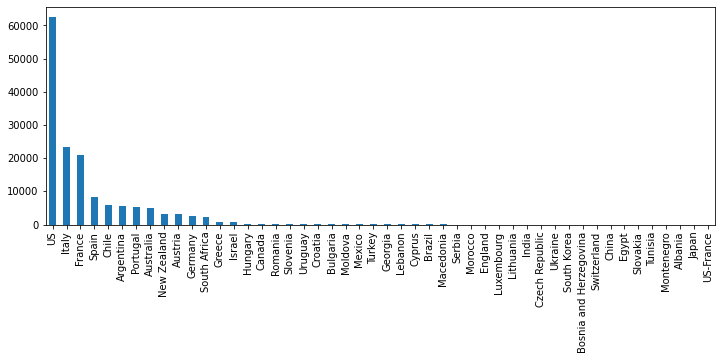

In [31]:
# 可视化对比
attri = "country"
plt.figure()
data[attri].value_counts(dropna=False).plot(kind='bar', figsize=(12, 4))
plt.figure()
data_new[attri].value_counts(dropna=False).plot(kind='bar', figsize=(12, 4))

#### （2）处理designation属性缺失--将缺失部分剔除

In [32]:
attri = "designation"
data_new1 = data.dropna(subset=[attri])

In [33]:
data_new1.shape

(105195, 10)

<AxesSubplot:>

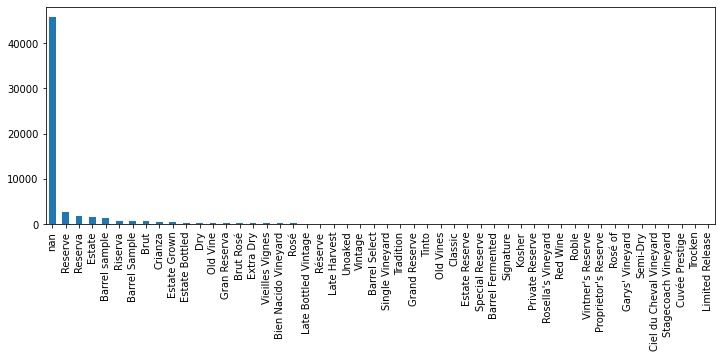

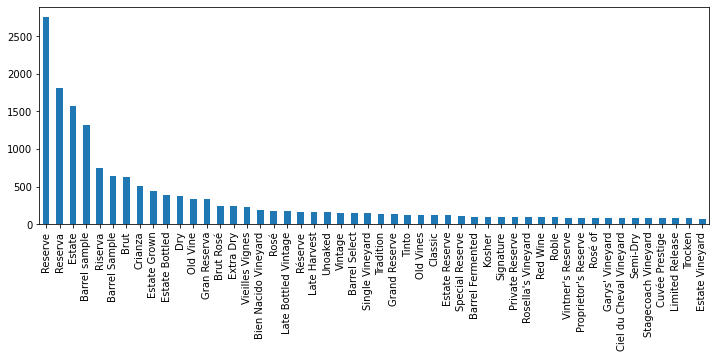

In [34]:
# 可视化对比，直方图中只显示前50项
attri = "designation"
plt.figure()
data[attri].value_counts(dropna=False)[:50].plot(kind='bar', figsize=(12, 4))
plt.figure()
data_new1[attri].value_counts(dropna=False)[:50].plot(kind='bar', figsize=(12, 4))

#### （3）处理price属性缺失--用最高频率值来填补缺失值

In [35]:
attri = "price"
mode = data[attri].mode()  # 众数
mode

0    20.0
dtype: float64

In [36]:
data_new2 = data.copy()
data_new2[attri] = data_new2[attri].fillna(int(mode))

<AxesSubplot:>

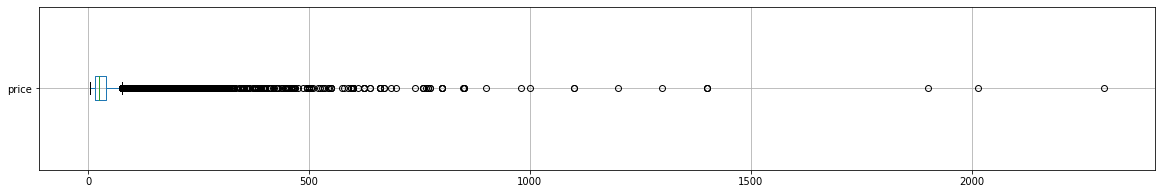

In [37]:
# 可视化对比
attri = "price"
data.boxplot([attri], vert=False, figsize=(20, 3))

<AxesSubplot:>

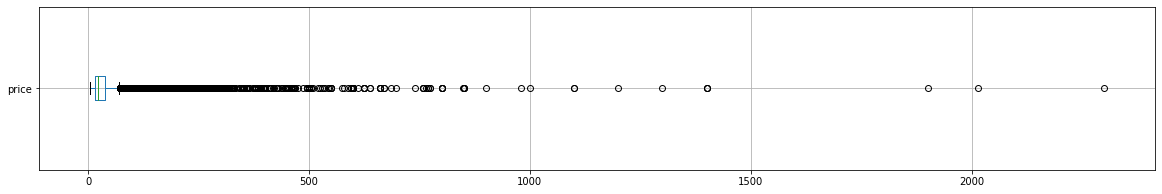

In [38]:
data_new2.boxplot([attri], vert=False, figsize=(20, 3))

#### （4）处理region_1属性缺失--用最高频率值来填补缺失值

In [39]:
attri = "region_1"
mode = data[attri].mode()
mode[0]

'Napa Valley'

In [40]:
data_new3 = data.copy()
data_new3[attri] = data_new3[attri].fillna(mode[0])

<AxesSubplot:>

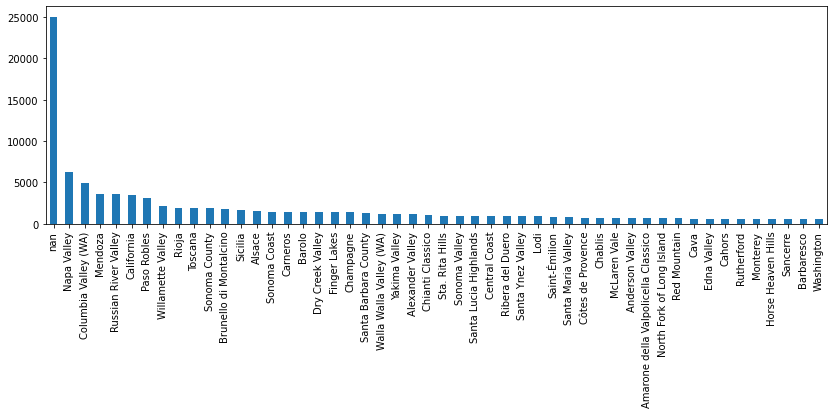

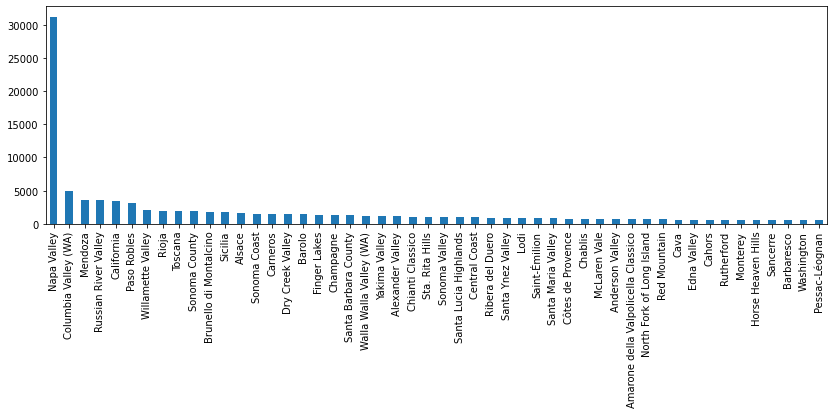

In [41]:
# 可视化对比，直方图中只显示前50项
attri = "region_1"
plt.figure()
data[attri].value_counts(dropna=False)[:50].plot(kind='bar', figsize=(14, 4))
plt.figure()
data_new3[attri].value_counts(dropna=False)[:50].plot(kind='bar', figsize=(14, 4))

#### （6）处理region_2属性缺失--将缺失部分剔除
原因可能是部分数据不存在region_2的属性

In [42]:
attri = "region_2"
data_new4 = data.dropna(subset=[attri])

In [43]:
data_new4.shape

(60953, 10)

<AxesSubplot:>

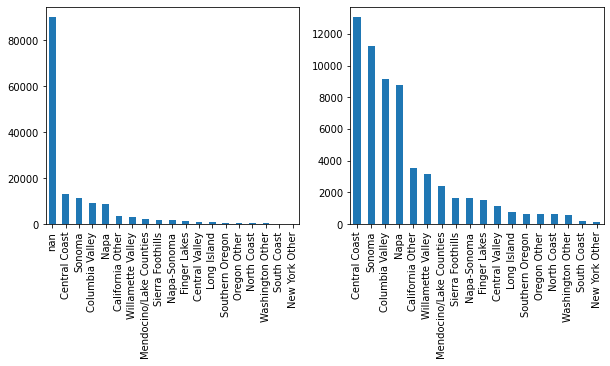

In [44]:
# 可视化对比
attri = "region_2"
plt.subplot(1,2,1) 
data[attri].value_counts(dropna=False).plot(kind='bar',figsize=(10, 4))
plt.subplot(1,2,2) 
data_new4[attri].value_counts(dropna=False).plot(kind='bar',figsize=(10, 4))